In [1]:
import pandas as pd

Чтение и обработка данных

In [2]:
#Данные по пользователям

user_info = pd.read_sql(
    """SELECT * FROM public.user_data""",
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
    "postgres.lab.karpov.courses:6432/startml"
)
user_info.head()

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads


In [3]:
#Посты, текст
posts_info = pd.read_sql(
    """SELECT * FROM public.post_text_df""",
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
    "postgres.lab.karpov.courses:6432/startml"
)
posts_info.head()

,post_id,text,topic
0,1,UK economy facing major risks\n\nThe UK manufa...,business
1,2,Aids and climate top Davos agenda\n\nClimate c...,business
2,3,Asian quake hits European shares\n\nShares in ...,business
3,4,India power shares jump on debut\n\nShares in ...,business
4,5,Lacroix label bought by US firm\n\nLuxury good...,business


In [4]:
#Посмотрим сколько записей в таблице действий пользователей
count_feed_data = pd.read_sql(
    """SELECT count(*) FROM public.feed_data""",

    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
    "postgres.lab.karpov.courses:6432/startml"
)
count_feed_data.head()

,count
0,76892800


In [5]:
# Попробуем считать для начала 10 миллионов записей
feed_data = pd.read_sql(
    """SELECT * FROM public.feed_data LIMIT 10000000""",

    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
    "postgres.lab.karpov.courses:6432/startml"
)
feed_data.head()

,timestamp,user_id,post_id,action,target
0,2021-12-28 14:09:53,121346,3931,like,0
1,2021-12-28 14:09:55,121346,4691,view,1
2,2021-12-28 14:12:09,121346,4691,like,0
3,2021-12-28 14:12:11,121346,1896,view,0
4,2021-12-28 14:15:08,121346,993,view,0


Обработка данных.

In [6]:
# Посмотрим на колонку таргет
feed_data[feed_data.action != "view"]

,timestamp,user_id,post_id,action,target
0,2021-12-28 14:09:53,121346,3931,like,0
2,2021-12-28 14:12:09,121346,4691,like,0
8,2021-12-28 14:17:18,121346,2709,like,0
10,2021-12-28 14:17:37,121346,1784,like,0
13,2021-12-28 14:20:35,121346,1907,like,0
...,...,...,...,...,...
9999948,2021-10-10 22:25:14,108632,4682,like,0
9999965,2021-12-10 07:32:22,143431,6988,like,0
9999974,2021-12-10 07:49:38,143431,978,like,0
9999978,2021-12-10 07:56:51,143431,2123,like,0


In [7]:
feed_data.head(50)

,timestamp,user_id,post_id,action,target
0,2021-12-28 14:09:53,121346,3931,like,0
1,2021-12-28 14:09:55,121346,4691,view,1
2,2021-12-28 14:12:09,121346,4691,like,0
3,2021-12-28 14:12:11,121346,1896,view,0
4,2021-12-28 14:15:08,121346,993,view,0
5,2021-12-28 14:15:33,121346,6848,view,0
6,2021-12-28 14:16:01,121346,6275,view,0
7,2021-12-28 14:16:38,121346,2709,view,1
8,2021-12-28 14:17:18,121346,2709,like,0
9,2021-12-28 14:17:20,121346,1784,view,1


In [8]:
#Получается, что строки с like - избыточная информация, так как перед этой строкой
#есть строка с view и таргетом 1
#Удалим строки где action == like
feed_data = feed_data[feed_data.action == "view"]
feed_data.head()

,timestamp,user_id,post_id,action,target
1,2021-12-28 14:09:55,121346,4691,view,1
3,2021-12-28 14:12:11,121346,1896,view,0
4,2021-12-28 14:15:08,121346,993,view,0
5,2021-12-28 14:15:33,121346,6848,view,0
6,2021-12-28 14:16:01,121346,6275,view,0


Давайте применим передовой подход к контентной фильтрации и сгенерируем информативные признаки из данных о пользователях и текстов/названий топиков постов (например, используя TF-IDF). Затем мы обучим модель бинарной классификации на данных о взаимодействии пользователей с постами.

Для конкретного пользователя, которому нужно выдать рекомендацию, мы будем выбирать некоторое количество постов и прогонять через модель классификации данные о пользователе и признаки постов. В ответ мы получим целевые значения, оценим вероятности и отсортируем их по убыванию. Наконец, мы выдадим пользователю n наиболее релевантных постов.
Текст выше был написан Codeium (LLM Open AI) 


In [9]:
#данные о пользователях возьмем как они есть сейчас
user_info

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads
...,...,...,...,...,...,...,...,...
163200,168548,0,36,Russia,Kaliningrad,4,Android,organic
163201,168549,0,18,Russia,Tula,2,Android,organic
163202,168550,1,41,Russia,Yekaterinburg,4,Android,organic
163203,168551,0,38,Russia,Moscow,3,iOS,organic


In [10]:
#Для извлечения эмбеддингов из текста постов применим tf-idf
import re
import string
import nltk
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

wnl = WordNetLemmatizer()
def preprocessing(line, token=wnl):
    line = line.lower()
    line = re.sub(r"[{}]".format(string.punctuation), " ", line)
    line = line.replace("\n\n", " ").replace("\n", " ")
    line = " ".join([token.lemmatize(x) for x in line.split(" ")])
    return line

tfidf = TfidfVectorizer(
    stop_words="english",
    preprocessor=preprocessing
)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Диман\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
tfidf_data = (
    tfidf
    .fit_transform(posts_info["text"])
    .toarray()
)
tfidf_data

E:\recom_sys\recom_sys_venv\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  warnings.warn(


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.13273932, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05061394, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
tfidf_data = pd.DataFrame(tfidf_data, index=posts_info.post_id, columns = tfidf.get_feature_names_out())
tfidf_data

,00,000,0001,000bn,000m,000s,000th,001,001and,001st,...,𝓫𝓮,𝓫𝓮𝓽𝓽𝓮𝓻,𝓬𝓸𝓾𝓻𝓽𝓼,𝓱𝓮𝓪𝓻𝓲𝓷𝓰,𝓶𝓪𝔂,𝓹𝓱𝔂𝓼𝓲𝓬𝓪𝓵,𝓼𝓸𝓸𝓷𝓮𝓻,𝓼𝓾𝓫𝓸𝓻𝓭𝓲𝓷𝓪𝓽𝓮,𝓽𝓱𝓮,𝓽𝓸
post_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.132739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.050614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7315,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7316,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7317,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#Получили большую разряженную матрицу
#Пытаемся кластеризовать тексты
#Мы выделяем 15 кластеров, это своего рода топики или что-то типа того, потом для каждого поста определяем 
#его расстояние до центра каждого кластера 
from sklearn.decomposition import PCA

centered = tfidf_data - tfidf_data.mean()

pca = PCA(n_components=20)
pca_decomp = pca.fit_transform(centered)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15, random_state=0).fit(pca_decomp)

posts_info["TextCluster"] = kmeans.labels_

dists_columns = ["DistanceTo1Clus",
                 "DistanceTo2Clus",
                 "DistanceTo3Clus",
                 "DistanceTo4Clus",
                 "DistanceTo5Clus",
                 "DistanceTo6Clus",
                 "DistanceTo7Clus",
                 "DistanceTo8Clus",
                 "DistanceTo9Clus",
                 "DistanceTo10Clus",
                 "DistanceTo11Clus",
                 "DistanceTo12Clus",
                 "DistanceTo13Clus",
                 "DistanceTo14Clus",
                 "DistanceTo15Clus"]
dists_df = pd.DataFrame(data=kmeans.transform(pca_decomp), columns=dists_columns)

dists_df.head()


E:\recom_sys\recom_sys_venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,DistanceTo1Clus,DistanceTo2Clus,DistanceTo3Clus,DistanceTo4Clus,DistanceTo5Clus,DistanceTo6Clus,DistanceTo7Clus,DistanceTo8Clus,DistanceTo9Clus,DistanceTo10Clus,DistanceTo11Clus,DistanceTo12Clus,DistanceTo13Clus,DistanceTo14Clus,DistanceTo15Clus
0,0.467393,0.444830,0.450909,0.508171,0.390763,0.430750,0.503676,0.439008,0.542919,0.482148,0.155208,0.529970,0.580428,0.684988,0.528089
1,0.336250,0.281124,0.306508,0.380135,0.192588,0.142459,0.423413,0.283425,0.441187,0.343087,0.248974,0.420314,0.343990,0.579459,0.410703
2,0.351136,0.320292,0.335959,0.397761,0.236343,0.331412,0.438996,0.312358,0.482496,0.366964,0.128727,0.442754,0.539270,0.523330,0.431119
3,0.312127,0.276534,0.275946,0.361429,0.163740,0.263775,0.418445,0.260268,0.448912,0.325792,0.221813,0.406009,0.496393,0.441326,0.385070
4,0.248289,0.216626,0.198497,0.304405,0.088897,0.211640,0.354831,0.167709,0.398088,0.264708,0.280125,0.396895,0.463684,0.497117,0.342740


In [14]:
posts_info = pd.concat((posts_info, dists_df), axis=1)
posts_info.head()

,post_id,text,topic,TextCluster,DistanceTo1Clus,DistanceTo2Clus,DistanceTo3Clus,DistanceTo4Clus,DistanceTo5Clus,DistanceTo6Clus,DistanceTo7Clus,DistanceTo8Clus,DistanceTo9Clus,DistanceTo10Clus,DistanceTo11Clus,DistanceTo12Clus,DistanceTo13Clus,DistanceTo14Clus,DistanceTo15Clus
0,1,UK economy facing major risks\n\nThe UK manufa...,business,10,0.467393,0.444830,0.450909,0.508171,0.390763,0.430750,0.503676,0.439008,0.542919,0.482148,0.155208,0.529970,0.580428,0.684988,0.528089
1,2,Aids and climate top Davos agenda\n\nClimate c...,business,5,0.336250,0.281124,0.306508,0.380135,0.192588,0.142459,0.423413,0.283425,0.441187,0.343087,0.248974,0.420314,0.343990,0.579459,0.410703
2,3,Asian quake hits European shares\n\nShares in ...,business,10,0.351136,0.320292,0.335959,0.397761,0.236343,0.331412,0.438996,0.312358,0.482496,0.366964,0.128727,0.442754,0.539270,0.523330,0.431119
3,4,India power shares jump on debut\n\nShares in ...,business,4,0.312127,0.276534,0.275946,0.361429,0.163740,0.263775,0.418445,0.260268,0.448912,0.325792,0.221813,0.406009,0.496393,0.441326,0.385070
4,5,Lacroix label bought by US firm\n\nLuxury good...,business,4,0.248289,0.216626,0.198497,0.304405,0.088897,0.211640,0.354831,0.167709,0.398088,0.264708,0.280125,0.396895,0.463684,0.497117,0.342740


In [15]:
df = pd.merge(feed_data, posts_info, on="post_id", how="left")
df.head()

,timestamp,user_id,post_id,action,target,text,topic,TextCluster,DistanceTo1Clus,DistanceTo2Clus,...,DistanceTo6Clus,DistanceTo7Clus,DistanceTo8Clus,DistanceTo9Clus,DistanceTo10Clus,DistanceTo11Clus,DistanceTo12Clus,DistanceTo13Clus,DistanceTo14Clus,DistanceTo15Clus
0,2021-12-28 14:09:55,121346,4691,view,1,Opposing Force [1986] wasnt as good as Dr. Str...,movie,0,0.110837,0.242499,...,0.288534,0.366165,0.123000,0.417714,0.141990,0.357249,0.445905,0.505879,0.586774,0.378048
1,2021-12-28 14:12:11,121346,1896,view,0,Martinez sees off Vinci challenge\n\nVeteran S...,sport,1,0.301271,0.147407,...,0.334398,0.352283,0.247735,0.428897,0.322230,0.365821,0.461188,0.517934,0.562342,0.385620
2,2021-12-28 14:15:08,121346,993,view,0,Blair damaged by Blunkett row\n\nA majority of...,politics,5,0.400751,0.382862,...,0.211709,0.479926,0.384345,0.509895,0.431076,0.424235,0.518012,0.246100,0.655493,0.488541
3,2021-12-28 14:15:33,121346,6848,view,0,You the living? OK I think I am an intelligent...,movie,0,0.128816,0.290330,...,0.318198,0.415341,0.211759,0.432524,0.187114,0.393392,0.448407,0.511582,0.604670,0.421582
4,2021-12-28 14:16:01,121346,6275,view,0,There is nothing worse than science fiction cr...,movie,0,0.212671,0.294175,...,0.327087,0.416006,0.217299,0.454152,0.284030,0.396743,0.457760,0.514667,0.625219,0.401169


In [16]:
df = pd.merge(df,
              user_info,
              on='user_id',
              how='left')

df.head()

,timestamp,user_id,post_id,action,target,text,topic,TextCluster,DistanceTo1Clus,DistanceTo2Clus,...,DistanceTo13Clus,DistanceTo14Clus,DistanceTo15Clus,gender,age,country,city,exp_group,os,source
0,2021-12-28 14:09:55,121346,4691,view,1,Opposing Force [1986] wasnt as good as Dr. Str...,movie,0,0.110837,0.242499,...,0.505879,0.586774,0.378048,1,14,Russia,Moscow,3,Android,organic
1,2021-12-28 14:12:11,121346,1896,view,0,Martinez sees off Vinci challenge\n\nVeteran S...,sport,1,0.301271,0.147407,...,0.517934,0.562342,0.385620,1,14,Russia,Moscow,3,Android,organic
2,2021-12-28 14:15:08,121346,993,view,0,Blair damaged by Blunkett row\n\nA majority of...,politics,5,0.400751,0.382862,...,0.246100,0.655493,0.488541,1,14,Russia,Moscow,3,Android,organic
3,2021-12-28 14:15:33,121346,6848,view,0,You the living? OK I think I am an intelligent...,movie,0,0.128816,0.290330,...,0.511582,0.604670,0.421582,1,14,Russia,Moscow,3,Android,organic
4,2021-12-28 14:16:01,121346,6275,view,0,There is nothing worse than science fiction cr...,movie,0,0.212671,0.294175,...,0.514667,0.625219,0.401169,1,14,Russia,Moscow,3,Android,organic


In [17]:
#А еще выделим признаки из timestamp
df["hour"] = pd.to_datetime(df["timestamp"]).apply(lambda x: x.hour)
df["month"] = pd.to_datetime(df["timestamp"]).apply(lambda x: x.month)
df.head()

,timestamp,user_id,post_id,action,target,text,topic,TextCluster,DistanceTo1Clus,DistanceTo2Clus,...,DistanceTo15Clus,gender,age,country,city,exp_group,os,source,hour,month
0,2021-12-28 14:09:55,121346,4691,view,1,Opposing Force [1986] wasnt as good as Dr. Str...,movie,0,0.110837,0.242499,...,0.378048,1,14,Russia,Moscow,3,Android,organic,14,12
1,2021-12-28 14:12:11,121346,1896,view,0,Martinez sees off Vinci challenge\n\nVeteran S...,sport,1,0.301271,0.147407,...,0.385620,1,14,Russia,Moscow,3,Android,organic,14,12
2,2021-12-28 14:15:08,121346,993,view,0,Blair damaged by Blunkett row\n\nA majority of...,politics,5,0.400751,0.382862,...,0.488541,1,14,Russia,Moscow,3,Android,organic,14,12
3,2021-12-28 14:15:33,121346,6848,view,0,You the living? OK I think I am an intelligent...,movie,0,0.128816,0.290330,...,0.421582,1,14,Russia,Moscow,3,Android,organic,14,12
4,2021-12-28 14:16:01,121346,6275,view,0,There is nothing worse than science fiction cr...,movie,0,0.212671,0.294175,...,0.401169,1,14,Russia,Moscow,3,Android,organic,14,12


In [18]:
#Уберем все ненужные колонки
df = df.drop(["action", "text"], axis=1)
df = df.set_index(["user_id", "post_id"])
df.head(50)

timestamp  target          topic  TextCluster   
user_id post_id                                                           
121346  4691    2021-12-28 14:09:55       1          movie            0  \
        1896    2021-12-28 14:12:11       0          sport            1   
        993     2021-12-28 14:15:08       0       politics            5   
        6848    2021-12-28 14:15:33       0          movie            0   
        6275    2021-12-28 14:16:01       0          movie            0   
        2709    2021-12-28 14:16:38       1          covid            2   
        1784    2021-12-28 14:17:20       1          sport            1   
        3353    2021-12-28 14:17:39       0          covid            2   
        1907    2021-12-28 14:18:22       1          sport            1   
        3490    2021-12-28 14:20:37       0          covid            2   
        961     2021-12-28 14:23:05       0       politics            7   
        2781    2021-12-28 14:24:36       0          covid            2   
        2427    2021-12-28 14:26:54       0          covid            2   
        6793    2021-12-28 14:28:46       1          movie            0   
        4448    2021-12-28 14:31:22       0          movie            0   
        6354    2021-12-28 14:33:27       0          movie            3   
        7077    2021-12-28 14:35:51       0          movie            9   
        1181    2021-12-28 14:36:07       0       politics            5   
        3028    2021-12-28 14:36:35       0          covid            2   
        893     2021-12-28 14:39:07       0  entertainment            4   
        4123    2021-12-28 14:40:59       0          covid            2   
        3674    2021-12-28 14:41:28       1          covid            2   
        5156    2021-12-28 14:41:51       0          movie            0   
41207   5703    2021-12-02 16:41:16       0          movie            3   
        6338    2021-12-02 16:42:07       0          movie            7   
        4086    2021-12-02 16:43:01       1          covid            2   
        4291    2021-12-02 16:45:30       0          movie            9   
        2847    2021-12-02 16:47:53       0          covid            2   
        3674    2021-12-02 16:50:52       0          covid            2   
        3452    2021-12-02 16:52:17       0          covid            2   
        7317    2021-12-02 16:52:31       1          movie            9   
        2124    2021-12-02 16:53:01       0           tech            4   
        4037    2021-12-02 16:53:23       0          covid            2   
        4992    2021-12-02 16:56:04       0          movie            3   
        3539    2021-12-02 16:56:42       0          covid            2   
        4492    2021-12-02 16:59:25       1          movie            8   
        3461    2021-12-02 17:01:47       0          covid            2   
        5961    2021-12-07 07:01:11       0          movie            0   
        1639    2021-12-07 07:01:56       0          sport            6   
        6745    2021-12-07 07:02:35       0          movie            7   
        1763    2021-12-07 07:03:40       0          sport            1   
        2512    2021-12-07 07:06:05       0          covid            2   
        4122    2021-12-07 07:07:18       0          covid            2   
        2166    2021-12-07 07:09:30       0           tech            1   
        3824    2021-12-07 07:10:14       0          covid            2   
        1341    2021-12-07 07:13:10       0       politics            5   
        3394    2021-12-07 07:13:32       1          covid            2   
        6238    2021-12-07 07:14:40       0          movie            0   
        3916    2021-12-07 07:17:18       0          covid            2   
        2974    2021-12-07 07:19:39       0          covid            2   

                 DistanceTo1Clus  DistanceTo2Clus  DistanceTo3Clus   
user_id post_id                                        

Обучаем модели!

In [19]:
#Начнем с решающего дерева, на тест и трейн будем делить по времени, так как мы будем предсказывать посты в будущем
max(df.timestamp), min(df.timestamp)

(Timestamp('2021-12-29 23:43:15'), Timestamp('2021-10-01 06:01:40'))

In [20]:
#не будем использовать тест тайм сплит а возьмем какую нибудь конкретную дату
df_train = df[df.timestamp < "2021-12-15"]
df_test = df[df.timestamp >= "2021-12-15"]

df_train = df_train.drop("timestamp", axis=1)
df_test = df_test.drop("timestamp", axis=1)

X_train = df_train.drop("target", axis=1)
X_test = df_test.drop("target", axis=1)

y_train = df_train["target"]
y_test = df_test["target"]

y_train.shape, y_test.shape


((7464962,), (1466346,))

In [21]:
#Начнем с решающего дерева

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from category_encoders.one_hot import OneHotEncoder

object_cols = [
    "topic", "TextCluster", "gender", "country", "city", "exp_group", "hour", "month", "os", "source"]

cols_for_one = [x for x in object_cols if X_train[x].nunique() < 5]
cols_for_mte = [x for x in object_cols if X_train[x].nunique() >= 5]

#Сохраним индексы этих колонок
cols_for_one_idx = [list(X_train.columns).index(col) for col in cols_for_one]
cols_for_mte_idx = [list(X_train.columns).index(col) for col in cols_for_mte]

t = [
    ("OneHotEncder", OneHotEncoder(), cols_for_one_idx),
    ("MeanTargetEncoder", TargetEncoder(), cols_for_mte_idx)
]

col_transform = ColumnTransformer(transformers=t)

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

pipe_dt = Pipeline([("column_transformer", col_transform),
                    
                    ("decision_tree", DecisionTreeClassifier())])
pipe_dt.fit(X_train, y_train)


Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('OneHotEncder',
                                                  OneHotEncoder(),
                                                  [17, 25, 22, 23]),
                                                 ('MeanTargetEncoder',
                                                  TargetEncoder(),
                                                  [0, 1, 19, 20, 21, 24])])),
                ('decision_tree', DecisionTreeClassifier())])

In [22]:
### Замерим качество работы такой модели
### Возьмем ROC-AUC

from sklearn.metrics import roc_auc_score

print(f"Качество на трейне: {roc_auc_score(y_train, pipe_dt.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, pipe_dt.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.9026598394887264
Качество на тесте: 0.5381860664604334


In [23]:
### Теперь обучим катбуст!

from catboost import CatBoostClassifier

catboost = CatBoostClassifier(iterations=100,
                              learning_rate=1,
                              depth=2)

catboost.fit(X_train, y_train, object_cols)

0:	learn: 0.3561051	total: 6.75s	remaining: 11m 8s
1:	learn: 0.3489558	total: 10.9s	remaining: 8m 54s
2:	learn: 0.3476268	total: 14.3s	remaining: 7m 40s
3:	learn: 0.3469162	total: 17.1s	remaining: 6m 50s
4:	learn: 0.3467161	total: 20.6s	remaining: 6m 32s
5:	learn: 0.3463407	total: 23.5s	remaining: 6m 8s
6:	learn: 0.3462003	total: 26.7s	remaining: 5m 54s
7:	learn: 0.3461224	total: 29.6s	remaining: 5m 40s
8:	learn: 0.3456741	total: 32.6s	remaining: 5m 29s
9:	learn: 0.3456453	total: 35.5s	remaining: 5m 19s
10:	learn: 0.3449836	total: 38.4s	remaining: 5m 10s
11:	learn: 0.3449341	total: 41.3s	remaining: 5m 2s
12:	learn: 0.3442867	total: 44.2s	remaining: 4m 55s
13:	learn: 0.3442153	total: 47.2s	remaining: 4m 50s
14:	learn: 0.3441190	total: 50.2s	remaining: 4m 44s
15:	learn: 0.3440435	total: 53.1s	remaining: 4m 38s
16:	learn: 0.3439640	total: 55.9s	remaining: 4m 33s
17:	learn: 0.3436712	total: 58.9s	remaining: 4m 28s
18:	learn: 0.3433881	total: 1m 1s	remaining: 4m 23s
19:	learn: 0.3433108	tot

In [24]:
### Замерим качество работы такой модели
### Возьмем ROC-AUC

print(f"Качество на трейне: {roc_auc_score(y_train, catboost.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, catboost.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.6685317619515806
Качество на тесте: 0.6499887253292583


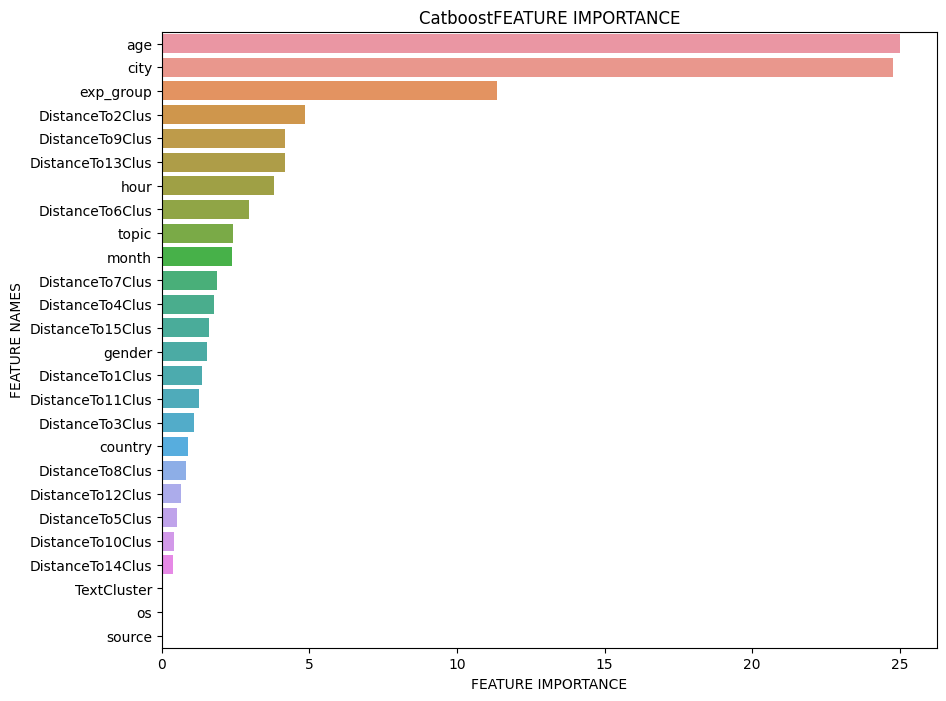

In [25]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(catboost.feature_importances_,X_train.columns,'Catboost')

In [26]:
catboost.save_model(
    'catboost_model',
    format="cbm"                  
)

Запишем в базу данных фичи для работы модели

In [27]:
posts_info.to_sql(    
   "posts_info_features_shat",                    
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
        "postgres.lab.karpov.courses:6432/startml")                

23

In [29]:
#Тест
test_ = pd.read_sql(
    """SELECT * FROM public.posts_info_features_shat""",
    
    con="postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
        "postgres.lab.karpov.courses:6432/startml"
)

test_

,index,post_id,text,topic,TextCluster,DistanceTo1Clus,DistanceTo2Clus,DistanceTo3Clus,DistanceTo4Clus,DistanceTo5Clus,DistanceTo6Clus,DistanceTo7Clus,DistanceTo8Clus,DistanceTo9Clus,DistanceTo10Clus,DistanceTo11Clus,DistanceTo12Clus,DistanceTo13Clus,DistanceTo14Clus,DistanceTo15Clus
0,0,1,UK economy facing major risks\n\nThe UK manufa...,business,10,0.467393,0.444830,0.450909,0.508171,0.390763,0.430750,0.503676,0.439008,0.542919,0.482148,0.155208,0.529970,0.580428,0.684988,0.528089
1,1,2,Aids and climate top Davos agenda\n\nClimate c...,business,5,0.336250,0.281124,0.306508,0.380135,0.192588,0.142459,0.423413,0.283425,0.441187,0.343087,0.248974,0.420314,0.343990,0.579459,0.410703
2,2,3,Asian quake hits European shares\n\nShares in ...,business,10,0.351136,0.320292,0.335959,0.397761,0.236343,0.331412,0.438996,0.312358,0.482496,0.366964,0.128727,0.442754,0.539270,0.523330,0.431119
3,3,4,India power shares jump on debut\n\nShares in ...,business,4,0.312127,0.276534,0.275946,0.361429,0.163740,0.263775,0.418445,0.260268,0.448912,0.325792,0.221813,0.406009,0.496393,0.441326,0.385070
4,4,5,Lacroix label bought by US firm\n\nLuxury good...,business,4,0.248289,0.216626,0.198497,0.304405,0.088897,0.211640,0.354831,0.167709,0.398088,0.264708,0.280125,0.396895,0.463684,0.497117,0.342740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,7018,7315,"OK, I would not normally watch a Farrelly brot...",movie,3,0.170459,0.342834,0.356752,0.136107,0.342660,0.374963,0.459097,0.261953,0.490837,0.320557,0.435604,0.497448,0.552907,0.643949,0.447577
7019,7019,7316,I give this movie 2 stars purely because of it...,movie,3,0.180934,0.321278,0.299812,0.078299,0.283915,0.338323,0.419406,0.208051,0.433487,0.245038,0.389202,0.453835,0.528374,0.614447,0.410226
7020,7020,7317,I cant believe this film was allowed to be mad...,movie,9,0.195215,0.271504,0.255868,0.288172,0.252500,0.309695,0.407476,0.161438,0.399107,0.064602,0.375461,0.447779,0.517239,0.601680,0.377256
7021,7021,7318,The version I saw of this film was the Blockbu...,movie,0,0.163161,0.294758,0.304869,0.300047,0.275207,0.321006,0.409027,0.205228,0.365463,0.178834,0.382829,0.463777,0.510224,0.582209,0.412108
